# Fourier Was All You Needed

**Author:** Sean Gibson  
**Date:** November 2025  
**Inspiration:** *"Attention Is All You Need"* (Vaswani et al., 2017) · *Joseph Fourier* (1822)  
**Theme:** The union of **mathematics, music, and meaning** — how language models hum with harmonic structure.
<br>

> Turning Transformer Positional Encodings into Harmonic Music

This notebook transforms the invisible mathematics of Transformers  
into **audible harmonies and visual rhythms**, uniting:
- **Joseph Fourier's** insight — that every signal can be expressed as a sum of sinusoids  
- with **Vaswani et al.'s** realization — that attention can learn meaning through position and relation  

We'll explore how the same sinusoids that encode *position* in a Transformer  
can be interpreted as **tones, chords, and frequencies** —  
revealing the music hidden in language models.

Because, let's be honest:  
**Fourier probably saw this coming in the 1800s.**

---

<details>
<summary><b>The Beautiful Irony</b></summary>

Here's the twist:  

In a Transformer, nearly everything is **learned** through a method called gradient descent —  
where token embeddings, attention weights, and feed-forward layers  
are all optimized through billions of training steps.  

But the **positional encodings** we're about to sonify?  
They're **fixed mathematical functions** — pure sinusoids, determined by formula, never touched by backpropagation.  

> **The most musical part of the Transformer — these harmonic Fourier waves —  
> is the only part that doesn't learn.**

They're not shaped by data or optimization.  
They're **architectural choices**, frozen geometry embedded in the model's foundation,  
resonating with Fourier's 250-year-old insight about decomposing signals into frequencies.  

What you're about to hear isn't the sound of machine learning.  
It's the sound of **pure mathematical structure** —  
the rhythmic scaffolding that lets everything else learn to dance.  

</details>

---
<details>
<summary><b>A Note on π</b></summary>

Look closely at the positional encoding formula and you'll find **π hidden inside**. 
```python
torch.sin(positions * div_terms)  # sine functions are 2π-periodic
```

> The same constant that relates a circle's infinte circumference to
> its diameter now helps language models understand the finite order of words.


The symbol **π** (pi) comes from the Greek word *περίμετρος* (*perimetros*), meaning *perimeter*.  
It was first used by **William Jones** in 1706, and later popularized by **Euler**,  
but the idea itself stretches back over **4,000 years** —  
to Babylonian tablets, Egyptian scrolls, and the geometry of ancient Greece.

For **Pythagoras**, **Euclid**, and later **Archimedes**,  
the circle was more than a shape — it was a symbol of *perfection and eternity*.  
Archimedes came closest to π's true value using polygons,  
laying the foundation for the continuous mathematics that **Newton** and **Leibniz** would later unfold.

From there, π's influence radiated outward:  
- **Circles** — the geometry of roundness and symmetry  
- **Waves** — the physics of oscillation and sound  
- **Heat diffusion** — where **Fourier** formalized his theory of harmonics  
- **Probability** — the bell curve, the normal distribution  
- **And now, intelligence itself** — the architecture of understanding  

From **Newton's motion**, to **Euler's identity**, to **Fourier's harmonics**,  
mathematicians revealed that **π** is more than a number —  
it's the measure of *recurrence*, the constant rhythm running through **geometry**, **physics**, and **thought**.

And in today's **Transformers**, π sings once again —  
encoded in sine waves and attention, binding sequence to meaning.

> Your Transformer hums with π's frequency.

</details>

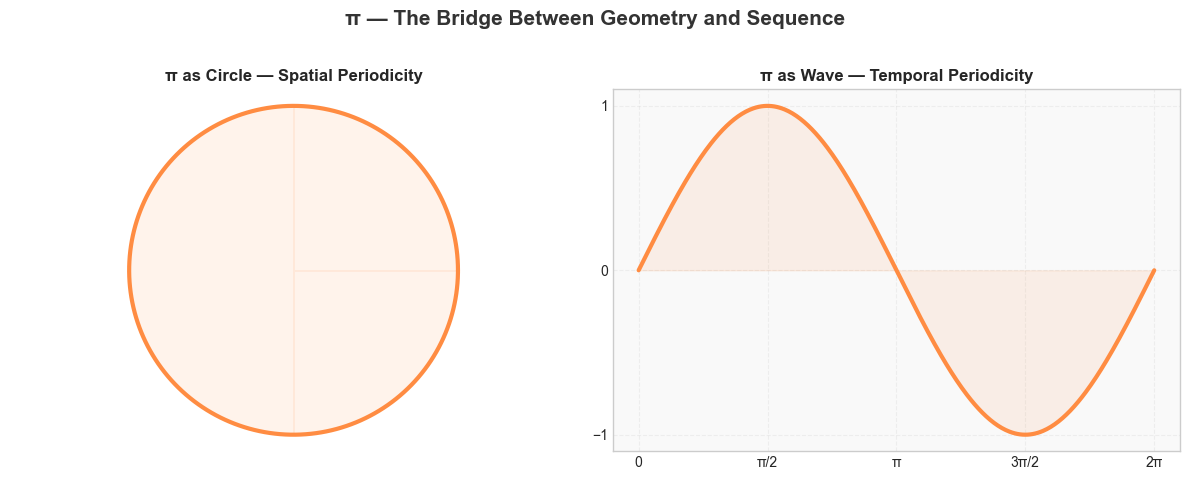

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.linspace(0, 2*np.pi, 400)
circle_x = np.cos(x)
circle_y = np.sin(x)
wave_y = np.sin(x)

# Figure setup
plt.style.use("seaborn-v0_8-whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(12, 5), facecolor="white")

# Common style settings
accent_color = "#FF8C42"   # warm orange-gold
bg_color = "#f9f9f9"

# --- Left: Circle ---
axs[0].set_facecolor(bg_color)
axs[0].plot(circle_x, circle_y, color=accent_color, lw=3)
axs[0].fill_betweenx(circle_y, circle_x, 0, color=accent_color, alpha=0.1)
axs[0].set_title("π as Circle — Spatial Periodicity", fontsize=12, weight="bold")
axs[0].axis("equal")
axs[0].axis("off")

# --- Right: Wave ---
axs[1].set_facecolor(bg_color)
axs[1].plot(x, wave_y, color=accent_color, lw=3)
axs[1].fill_between(x, wave_y, 0, color=accent_color, alpha=0.1)
axs[1].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axs[1].set_xticklabels(["0", "π/2", "π", "3π/2", "2π"])
axs[1].set_yticks([-1, 0, 1])
axs[1].set_yticklabels(["−1", "0", "1"])
axs[1].set_title("π as Wave — Temporal Periodicity", fontsize=12, weight="bold")
axs[1].grid(alpha=0.25, linestyle="--")

# --- Overall Title ---
plt.suptitle("π — The Bridge Between Geometry and Sequence", fontsize=15, weight="bold", color="#333", y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

In [37]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
from mido import Message, MidiFile, MidiTrack
import os

print("Imported math")
print(f"Imported torch (version {torch.__version__})")
print(f"Imported numpy (version {np.__version__})")
print("Imported matplotlib.pyplot")
print("Imported transformers (AutoTokenizer, AutoModel)")
print("Imported mido (Message, MidiFile, MidiTrack)")
print("Imported os")
print("All libraries successfully imported and ready to use.")

Imported math
Imported torch (version 2.8.0)
Imported numpy (version 2.0.2)
Imported matplotlib.pyplot
Imported transformers (AutoTokenizer, AutoModel)
Imported mido (Message, MidiFile, MidiTrack)
Imported os
All libraries successfully imported and ready to use.


## Understanding Sinusoidal Positional Encodings

Transformers have no built-in sense of order,  
so we inject **positional information** into token embeddings.  

Each position is represented by a unique pattern of sine and cosine waves  
with exponentially scaled frequencies —  
a direct homage to Fourier’s principle of signal decomposition.

---

<details>
<summary><b>How It Works (click to expand)</b></summary>
    
Each position `pos` and dimension `i` is encoded as:
<p align="center">
$PE(pos, 2i) = \sin\!\left(\frac{pos}{10000^{2i/d}}\right), \quad
PE(pos, 2i+1) = \cos\!\left(\frac{pos}{10000^{2i/d}}\right)$
</p>

These alternating sine/cosine pairs create a **multi-frequency fingerprint**  
that the model can use to infer both **absolute** and **relative** positions.

- Low dimensions oscilate slowly (coarse order).  
- High dimensions oscillate rapidly (fine detail).

</details>

In [38]:
def sinusoidal_positional_encoding(seq_len, d_model):
    positions = torch.arange(seq_len).unsqueeze(1)
    div_terms = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
    pe = torch.zeros(seq_len, d_model)
    pe[:, 0::2] = torch.sin(positions * div_terms)
    pe[:, 1::2] = torch.cos(positions * div_terms)
    return pe

print("Defined function: sinusoidal_positional_encoding")

Defined function: sinusoidal_positional_encoding


## Visualizing the Geometry of Position  

When we feed a sequence of tokens into a transformer, the model must somehow *know* where each token sits —  
not by counting, but by encoding position as **waves of meaning**.  

These waves are **sinusoidal positional encodings**, a mathematical rhythm first introduced in  
*"Attention Is All You Need" (Vaswani et al., 2017).*  
They give each token a unique signature based on its position — like coordinates in frequency space.

---

### Scale and Context  

This visualization shows a small example — **64 tokens × 256 dimensions** —  
but large models use the same principle at far greater scale:

| Model | Embedding Dim (`d_model`) | Max Sequence Length | Positional Encoding Type |
|-------|---------------------------|----------------------|--------------------------|
| **Our Visualization** | 256 | 64 tokens | Sinusoidal (Fourier) |
| **Original Transformer (2017)** | 512 | 512 tokens | Sinusoidal (Fourier) |
| **BERT Base (2018)** | 768 | 512 tokens | Sinusoidal (Fourier) |
| **GPT-2 (2019)** | 768 | 1024 tokens | Learned embeddings |
| **GPT-3 (2020)** | 12,288 | 2048 tokens | Learned embeddings |
| **LLaMA / LLaMA 2 (2023)** | 4096 – 8192 | 4096+ tokens | RoPE (Rotary) |

---

### The Evolution of Positional Encoding  
Sinusoidal encodings were the **first great breakthrough** in letting attention models understand order.  
Later architectures built on the same idea in new ways:
- **Learned embeddings** (GPT-2, GPT-3) let the model discover its own positional patterns.  
- **RoPE (Rotary Position Embeddings)** rotate vectors in multi-dimensional space to encode distance.  
- **ALiBi** uses linear attention biases rather than explicit encodings.  

Despite their differences, all share one insight:  
> *Position must be encoded as a unique mathematical signature.*

---

### What You’re Seeing  
The two visualizations together reveal both the **structure** and the **motion** behind those signatures:  
- The **2D heatmap** shows the entire positional lattice — a static blueprint of frequency interference.  
- The **3D animation** transforms that lattice into a living waveform —  
  a vivid metaphor for how the model feels the rhythm of sequence.

<details>
<summary><strong>The Left Plot — 2D Heatmap of the Encoding Matrix</strong></summary>

The heatmap on the **left** is the full **positional encoding matrix**.  
- The **x-axis** runs over token positions in a sequence (from 1st to last).  
- The **y-axis** runs over embedding dimensions (each representing a different sine/cosine frequency).  
- The **color** shows the *amplitude* of each wave at that position.  

Together, these oscillations form a glowing spectrum —  
a **woven fingerprint of frequencies** that tells the model *where* each token is,  
even though transformers have no sense of order on their own.

> Each **row** is a token’s positional “chord,”  
> a harmonic mix of sine and cosine waves encoding location in the sequence.

You can see two main kinds of structure:  
- **Broad, sweeping bands** → low-frequency waves, giving the model a sense of global order.  
- **Tight, rapid stripes** → high-frequency waves, encoding fine-grained position.  

This is the **mathematical heartbeat of attention** —  
a pattern that lets the model *feel* position without ever explicitly counting.

</details>

---

<details>
<summary><strong>The Right Plot — Animated 3D “Living Wave”</strong></summary>

The visualization on the **right** brings those encodings to life in 3D.  
Here, we treat the same positional matrix as a **landscape of waves**:  
- The surface rises and falls according to sinusoidal amplitudes.  
- The animation sweeps phase over time, making the surface pulse and shimmer —  
  a living representation of Fourier’s harmonics in motion.

It’s as if we could *see* how the transformer’s notion of “position” ripples across dimensions.  
Each crest and trough corresponds to how strongly a particular frequency resonates at a given position.

> Think of it like music rendered in math —  
> each wave oscillates in tune with the others,  
> composing the spatial rhythm that gives language its sequence.

</details>

<br>

**Fourier’s waves became the geometry of language.**
<br>

They are what made it possible for attention to understand “next,” “before,” and “after” —  
the silent, harmonic scaffolding of meaning that powers every modern transformer.

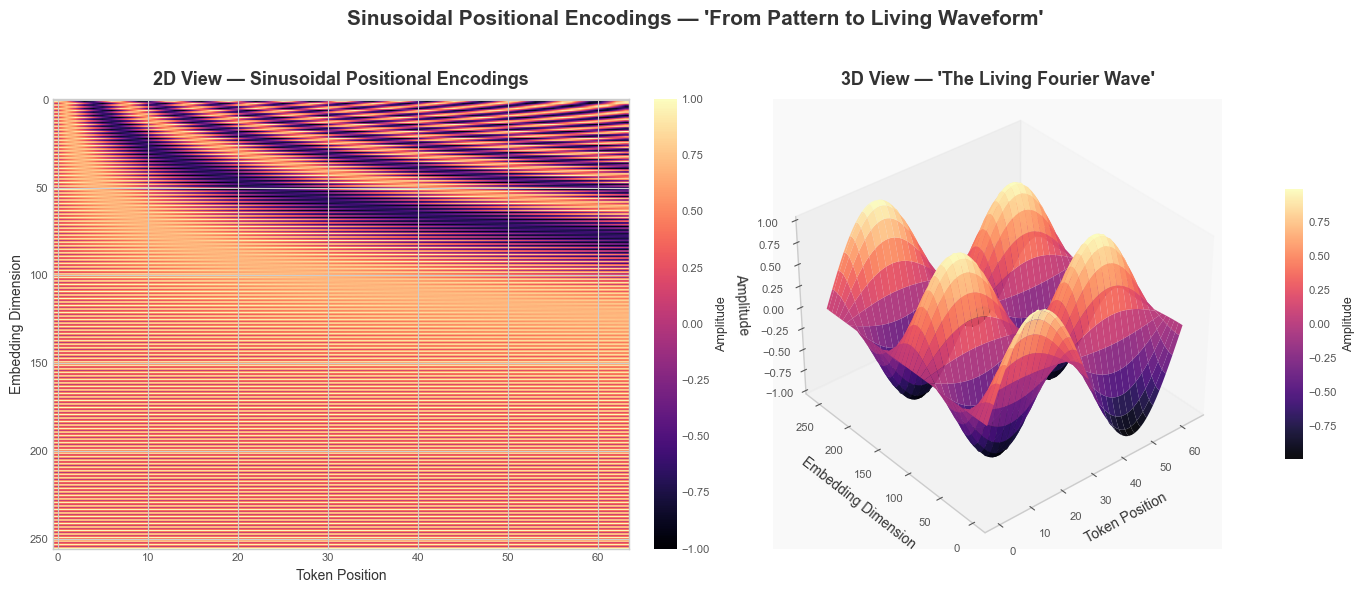

Displayed animated 3D sinusoidal positional encoding alongside static 2D view.


In [39]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from matplotlib.animation import FuncAnimation

import torch
import math

def sinusoidal_positional_encoding(seq_len, dim, device=None, dtype=torch.float32):
    if device is None:
        device = "cpu"
    position = torch.arange(seq_len, dtype=dtype, device=device).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, dim, 2, dtype=dtype, device=device) * (-math.log(10000.0) / dim))
    pe = torch.zeros(seq_len, dim, dtype=dtype, device=device)
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    return pe

# --- Base Encoding Data ---
pe = sinusoidal_positional_encoding(64, 256)

# --- Style Settings ---
plt.style.use("seaborn-v0_8-whitegrid")
accent_color = "#FF8C42"
bg_color = "#f9f9f9"
text_color = "#333333"

# --- Prepare Data for Surfaces ---
positions = np.arange(pe.shape[0])
dimensions = np.arange(pe.shape[1])
X, Y = np.meshgrid(positions, dimensions)
Z = pe.T  # (embedding_dim, positions)

# --- Create Figure (2D + 3D) ---
fig = plt.figure(figsize=(14, 6), facecolor="white")

# ========== LEFT: Static 2D Heatmap ==========
ax1 = fig.add_subplot(1, 2, 1)
im = ax1.imshow(Z, aspect="auto", cmap="magma", interpolation="bilinear")
ax1.set_title("2D View — Sinusoidal Positional Encodings", fontsize=13, weight="bold", color=text_color, pad=10)
ax1.set_xlabel("Token Position", fontsize=10, color=text_color)
ax1.set_ylabel("Embedding Dimension", fontsize=10, color=text_color)
ax1.tick_params(colors="#555555", labelsize=8)
ax1.set_facecolor(bg_color)

cbar1 = plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
cbar1.set_label("Amplitude", fontsize=9, color=text_color)
cbar1.outline.set_edgecolor("none")
cbar1.ax.tick_params(labelsize=8, colors="#555555")

# ========== RIGHT: Animated 3D Surface ==========
ax2 = fig.add_subplot(1, 2, 2, projection="3d", facecolor=bg_color)
ax2.set_title("3D View — 'The Living Fourier Wave'", fontsize=13, weight="bold", color=text_color, pad=10)
ax2.set_xlabel("Token Position", fontsize=10, color=text_color)
ax2.set_ylabel("Embedding Dimension", fontsize=10, color=text_color)
ax2.set_zlabel("Amplitude", fontsize=10, color=text_color)
ax2.view_init(elev=35, azim=230)
ax2.grid(False)
ax2.tick_params(colors="#555555", labelsize=8)

# Initial surface
Z_wave = np.sin(X * 0.1) * np.cos(Y * 0.05)
surf = [ax2.plot_surface(X, Y, Z_wave, cmap="magma", linewidth=0, antialiased=True, alpha=0.95)]

cbar2 = plt.colorbar(surf[0], ax=ax2, shrink=0.6, aspect=15, pad=0.1)
cbar2.set_label("Amplitude", fontsize=9, color=text_color)
cbar2.outline.set_edgecolor("none")
cbar2.ax.tick_params(labelsize=8, colors="#555555")

# --- Unified Title ---
plt.suptitle("Sinusoidal Positional Encodings — 'From Pattern to Living Waveform'",
             fontsize=15, weight="bold", color=text_color, y=0.98)

# --- Animation Function ---
def update(frame):
    ax2.collections.clear()  # clear previous surface
    Z_anim = np.sin(X * 0.1 + frame / 10.0) * np.cos(Y * 0.05)
    surf[0] = ax2.plot_surface(X, Y, Z_anim, cmap="magma", linewidth=0, antialiased=True, alpha=0.95)
    return surf

# --- Run Animation ---
anim = FuncAnimation(fig, update, frames=150, interval=70, blit=False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("Displayed animated 3D sinusoidal positional encoding alongside static 2D view.")

In [40]:
# --- Extract token embeddings from BERT ---

from transformers import AutoTokenizer, AutoModel
import torch

# Define input sentence
sentence = "Attention turns meaning into motion, and motion into music."

# Load pretrained BERT model + tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Tokenize and encode the sentence
inputs = tokenizer(sentence, return_tensors="pt")
outputs = model(**inputs)

# Extract token embeddings (shape: [num_tokens, 768])
embeddings = outputs.last_hidden_state.squeeze(0)
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

print(f"Generated embeddings for {len(tokens)} tokens — shape: {embeddings.shape}")

Generated embeddings for 13 tokens — shape: torch.Size([13, 768])


## Extracting Token Embeddings from BERT

<details>
<summary><b>Understanding Semantic Meaning</b></summary>

Now we introduce **semantic meaning** — how a pretrained model like BERT understands words in context.

We’ll begin with the sentence:

> **"Attention turns meaning into motion, and motion into music."**

This phrase serves as our input for BERT — a model trained to understand words through context.

Each token in a sentence is transformed into a **768-dimensional vector**,  
a numerical expression of meaning learned from billions of words.  
These embeddings are not hand-coded rules or dictionary definitions —  
they are *coordinates in a high-dimensional conceptual space*  
where words with similar meanings naturally cluster close together.

BERT builds this space by learning to predict masked words and relationships between sentences.  
Over time, it learns an internal **semantic geometry** —  
a map where distance encodes difference, and proximity encodes similarity.  

We’ll later combine these semantic embeddings with **positional encodings**,  
so that our musical mappings can reflect both *what* is said and *where* it occurs in the sequence.  
But before we add rhythm to meaning, let’s first *see* what meaning itself looks like.
</details>

---

<details>
<summary><b>Visualizing the Semantic Cloud</b></summary>

Every token in the sentence becomes a point in this multidimensional landscape —  
a 768-dimensional vector describing its contextual role, tone, and relation to others.  

Each dimension captures a subtle feature of language:  
syntax, sentiment, topic, or the gravitational pull between words that appear together.  
Together, these dimensions form the **geometry of meaning**.

Because we can’t directly visualize 768 dimensions,  
we use **t-SNE** (t-Distributed Stochastic Neighbor Embedding)  
to project these high-dimensional embeddings into a space we can perceive —  
first into **2D**, and then into a **3D semantic cloud** that reveals their relationships.
</details>

---

<details>
<summary><b>Interpreting the Visualization</b></summary>

In the resulting projection:

- Each **dot** represents a token’s embedding — a point in conceptual space.  
- The **distance** between dots reflects **semantic closeness**:  
  words with related meanings cluster together,  
  while distant ones differ in function or context.  
- The **color gradient** follows the token’s order in the sentence,  
  revealing how meaning flows across time.  
- `[CLS]` marks the model’s *conceptual beginning*,  
  and `[SEP]` its *boundary of comprehension*.
</details>

---

<details>
<summary><b>Stability and Instability</b></summary>

Not all tokens are created equal — some meanings are **anchored**, others are **fluid**.  
We can visualize this by measuring the *stability* of each embedding —  
how much variance it has across its 768 dimensions.

- **Stable tokens** (smaller points) have more uniform activations —  
  their embeddings stay compact and consistent across dimensions.  
  They represent concepts the model understands clearly.  
- **Unstable tokens** (larger points) have higher variance —  
  their embeddings stretch across more of the model’s space,  
  reflecting greater contextual flexibility or ambiguity.

In our example, the word **“meaning”** emerged as the most stable token —  
its embedding varied least across all 768 dimensions.  
Mathematically, that means its internal representation was the most consistent,  
as if the model holds that concept firmly at the center of its semantic space.

By contrast, tokens like punctuation or conjunctions (`,`, *and*, *into*)  
showed lower stability, suggesting they flex more depending on context.  
</details>

---

<details>
<summary><b>Context Shapes Stability — “motion” vs. “motion”</b></summary>

A fascinating observation: the word **“motion”** appears *twice* in our sentence,  
yet with *two very different stability scores*.  

In the phrase *“turns meaning into motion”*, **motion** is being *created* —  
an abstract, generative idea representing transformation or energy.  
The model encodes this usage with **higher variance**, capturing creativity as fluid and metaphorical nature.

Later, in *“motion into music”*, **motion** becomes *the source* —  
a stable, concrete concept being transformed into something else.  
Here, the model’s representation is **more consistent**, capturing the stability of brining chaos into order.

This difference highlights a key principle:  
> Stability is not a property of the word — it’s a property of its meaning in context.

Even identical tokens can occupy entirely different regions of BERT’s conceptual space,  
depending on their **semantic role** within the sentence.
</details>

---

<details>
<summary><b>Polysemy: Words That Refuse to Stay Still</b></summary>

Some words are naturally **unstable**, because their meanings shift depending on context.  
These are *polysemous* words — words with multiple, legitimate interpretations.  

For example:

- **bank** → could mean a *financial institution* or the *edge of a river*  
- **pitch** → could describe *throwing a ball*, *the tone of a sound*, or *a sales proposal*  
- **light** → can mean *illumination*, *not heavy*, or even *to ignite*  
- **cell** → could be *a biological structure*, *a prison room*, or *a phone*  

For a language model, such words require embeddings that can stretch and rotate through semantic space —  
bending their geometry to match the surrounding context.  
This naturally increases their **variance**, and therefore lowers their measured *stability*.

So when we see a token with higher instability,  
it doesn’t mean the model is confused — it means the concept is **alive**, flexible, and context-aware.
</details>

---

<details>
<summary><b>Interpreting Stability</b></summary>

This distinction isn’t literal “confidence,”  
but rather a window into how the model distributes *representational attention* —  
anchoring some words firmly, while letting others drift.

> The more meanings a word could have,  
> the more dimensions its representation tends to explore.  
> The more precise a word’s meaning, the more still its vector becomes.

⚠️ *Note:* This stability measure isn’t used in the musical mapping below —  
it’s included here as an interpretive tool,  
highlighting how models balance **certainty and ambiguity**  
in their internal understanding of language.
</details>

---

<details>
<summary><b>The Conceptual Constellation</b></summary>

What emerges is a **conceptual constellation** —  
a cloud where related ideas orbit one another,  
where stability and instability dance together,  
and language itself becomes geometry.  

It’s BERT’s internal understanding made visible —  
the hidden shape of thought.
</details>

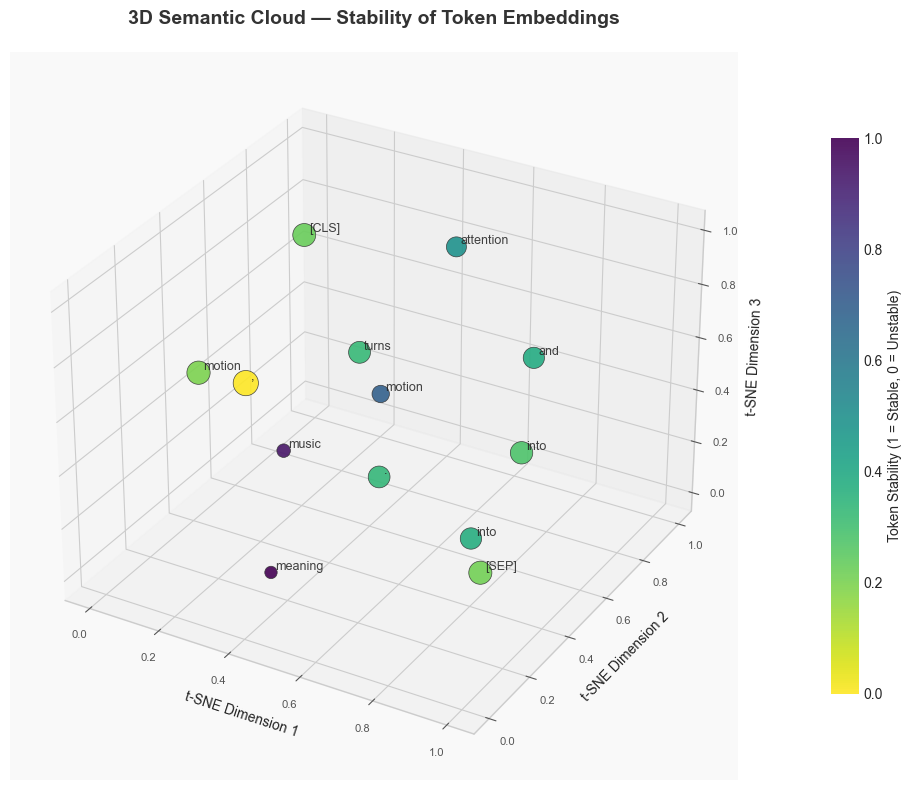


Token Stability Scores:
       [CLS] → stability=0.229
   attention → stability=0.490
       turns → stability=0.325
     meaning → stability=1.000
        into → stability=0.278
      motion → stability=0.693
           , → stability=0.000
         and → stability=0.385
      motion → stability=0.197
        into → stability=0.372
       music → stability=0.940
           . → stability=0.335
       [SEP] → stability=0.212


In [41]:
# --- 3D Visualization of Token Embeddings with Stability Sizing and Color Coding ---

from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# --- Compute Stability ---
variances = embeddings.var(dim=1).detach().numpy()
stability = 1 - (variances - variances.min()) / (variances.max() - variances.min())
sizes = 80 + (1 - stability) * 250  # less stable → larger

# --- Dimensionality Reduction: 768 → 3D ---
tsne_3d = TSNE(n_components=3, perplexity=5, max_iter=1000, random_state=42)
emb_3d = tsne_3d.fit_transform(embeddings.detach().numpy())

# Normalize for cleaner visualization
x, y, z = emb_3d[:, 0], emb_3d[:, 1], emb_3d[:, 2]
x = (x - x.min()) / (x.max() - x.min())
y = (y - y.min()) / (y.max() - y.min())
z = (z - z.min()) / (z.max() - z.min())

# --- Styling Setup ---
plt.style.use("seaborn-v0_8-whitegrid")
accent_color = "#FF8C42"
bg_color = "#f9f9f9"

fig = plt.figure(figsize=(10, 8), facecolor="white")
ax = fig.add_subplot(111, projection="3d", facecolor=bg_color)

# --- Scatter Plot ---
sc = ax.scatter(
    x, y, z,
    c=stability,
    cmap="viridis_r",            # bright = stable
    s=sizes,
    alpha=0.9,
    edgecolors="#333",
    linewidths=0.5
)

# --- Token Annotations ---
for i, token in enumerate(tokens):
    ax.text(
        x[i] + 0.008, y[i] + 0.008, z[i] + 0.008,
        token,
        fontsize=9,
        alpha=0.85,
        color="#222"
    )

# --- Axes and Title ---
ax.set_title("3D Semantic Cloud — Stability of Token Embeddings", 
             fontsize=14, weight="bold", color="#333", pad=20)
ax.set_xlabel("t-SNE Dimension 1", fontsize=10)
ax.set_ylabel("t-SNE Dimension 2", fontsize=10)
ax.set_zlabel("t-SNE Dimension 3", fontsize=10)

# Subtle axis styling
ax.tick_params(colors="#555", labelsize=8)
ax.xaxis.line.set_color("#ccc")
ax.yaxis.line.set_color("#ccc")
ax.zaxis.line.set_color("#ccc")

# --- Colorbar ---
cbar = plt.colorbar(sc, ax=ax, pad=0.1, fraction=0.03)
cbar.set_label("Token Stability (1 = Stable, 0 = Unstable)", fontsize=10)
cbar.outline.set_edgecolor("none")

plt.tight_layout()
plt.show()

# --- Console Output: Color-Coded Stability Printout ---
print("\nToken Stability Scores:")

cmap = mpl.colormaps.get("viridis_r")
norm = mpl.colors.Normalize(vmin=0, vmax=1)

for token, s in zip(tokens, stability):
    r, g, b = [int(255 * c) for c in cmap(norm(s))[:3]]
    color_text = f"\033[38;2;{r};{g};{b}m"
    reset = "\033[0m"
    print(f"{color_text}{token:>12s} → stability={s:.3f}{reset}")

## Mapping Vectors to Musical Notes

Every token vector — whether it encodes **position** or **meaning** — is a bundle of oscillating numerical values.  
Each one vibrates across hundreds of dimensions, a mathematical resonance rather than a physical sound.  

By **normalizing** and **averaging** these values,  we distill each high-dimensional pattern into a single representative **pitch**,  
mapped into a musical range (C3 – C6). The result is simple but expressive: each **position** becomes a **note**, each **sequence** a **melody**.

To give these melodies depth, we add an optional **Fourier drone** — a sustained bass tone that hums beneath the sequence.  
It acts like a root note in harmony, a grounding frequency against which the encoded notes can resonate.

Together, these tones turn the embedding space into a kind of **digital staff**, where mathematical structure becomes musical form,  
and the language model’s hidden activations compose their own score.

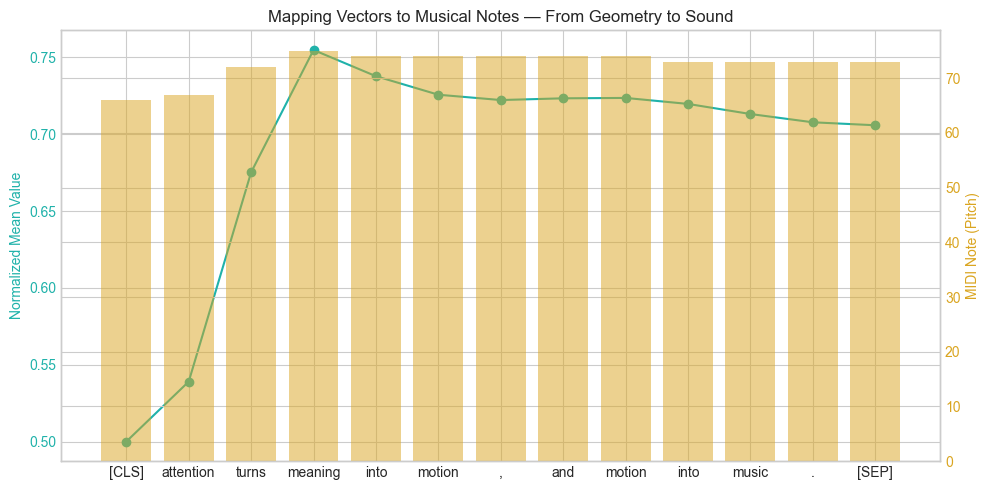

In [42]:
def vector_to_note(vec, note_range=(48, 84)):
    norm = (vec - vec.min()) / (vec.max() - vec.min())
    mean_val = norm.mean().item()
    note = int(note_range[0] + mean_val * (note_range[1] - note_range[0]))
    return note

import matplotlib.pyplot as plt
import numpy as np

tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
notes = [vector_to_note(pe[i]) for i in range(len(tokens))]
means = [( (pe[i] - pe[i].min()) / (pe[i].max() - pe[i].min()) ).mean().item() for i in range(len(tokens))]

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(means, marker='o', color='lightseagreen', label='Normalized Mean (Vector Energy)')
ax1.set_ylabel("Normalized Mean Value", color='lightseagreen')
ax1.tick_params(axis='y', labelcolor='lightseagreen')

ax2 = ax1.twinx()
ax2.bar(range(len(tokens)), notes, color='goldenrod', alpha=0.5, label='MIDI Note')
ax2.set_ylabel("MIDI Note (Pitch)", color='goldenrod')
ax2.tick_params(axis='y', labelcolor='goldenrod')

plt.title("Mapping Vectors to Musical Notes — From Geometry to Sound")
plt.xticks(range(len(tokens)), tokens, rotation=45, ha='right')
plt.tight_layout()
plt.show()


def make_midi_from_encodings(pe, filename="Attention_is_all_you_need.mid", add_drone=True, drone_note=36):
    mid = MidiFile()
    track = MidiTrack()
    mid.tracks.append(track)

    # --- Optional Fourier Drone ---
    if add_drone:
        track.append(Message('note_on', note=drone_note, velocity=40, time=0))
        print(f"Added Fourier drone note: {drone_note} (C2)")

    for i in range(pe.shape[0]):
        note = vector_to_note(pe[i])
        track.append(Message('note_on', note=note, velocity=64, time=64))
        track.append(Message('note_off', note=note, velocity=64, time=128))

    if add_drone:
        # Stop the drone after full duration
        track.append(Message('note_off', note=drone_note, velocity=40, time=pe.shape[0] * 128))

    mid.save(filename)
    print(f"Saved MIDI file: {filename}")

## Combining Semantics and Position — *The Semantic Chords*

Now we blend **positional structure** with **semantic meaning**, 
creating musical representations that encode both *what* is said and *where* it occurs in the sequence.

This mirrors the very first operation inside a Transformer: adding **word embeddings** 
and **positional encodings** to form a single, context-aware signal.

When we map these fused vectors to sound, we’re effectively listening to 
how the model binds *meaning to order* — the harmony of semantics and structure.

In [43]:
seq_len, dim = embeddings.shape
pe = sinusoidal_positional_encoding(seq_len, dim)
semantic_pe = embeddings + pe

# Detach from graph before passing to numpy-based function
semantic_pe = semantic_pe.detach()

make_midi_from_encodings(semantic_pe, "semantics.mid", add_drone=True)
print("Generated MIDI file: semantics.mid")

Added Fourier drone note: 36 (C2)
Saved MIDI file: semantics.mid
Generated MIDI file: semantics.mid


## Visualizing the Music of Meaning

Now that we’ve combined semantic and positional encodings,  
we can start to *see* how numbers become notes.

These next visuals show three layers of translation:

1. The **Fourier waves** that carry positional rhythm  
2. The **token-to-note mapping** that turns vectors into pitches  
3. The **melodic contour** of the entire sentence — the “shape” of its music

### The Fourier Waves — Positional Encodings

This heatmap shows the **sinusoidal oscillations** used to encode token positions.  
Each vertical stripe represents a token; each horizontal band a frequency component.

- **Warm tones** (bright bands) indicate higher activation.  
- **Cool tones** show lower amplitude.  

Slow waves (bottom) capture *broad structure*, while faster waves (top) encode *fine-grained order*.  

It’s the harmonic foundation — the Transformer’s sense of rhythm.

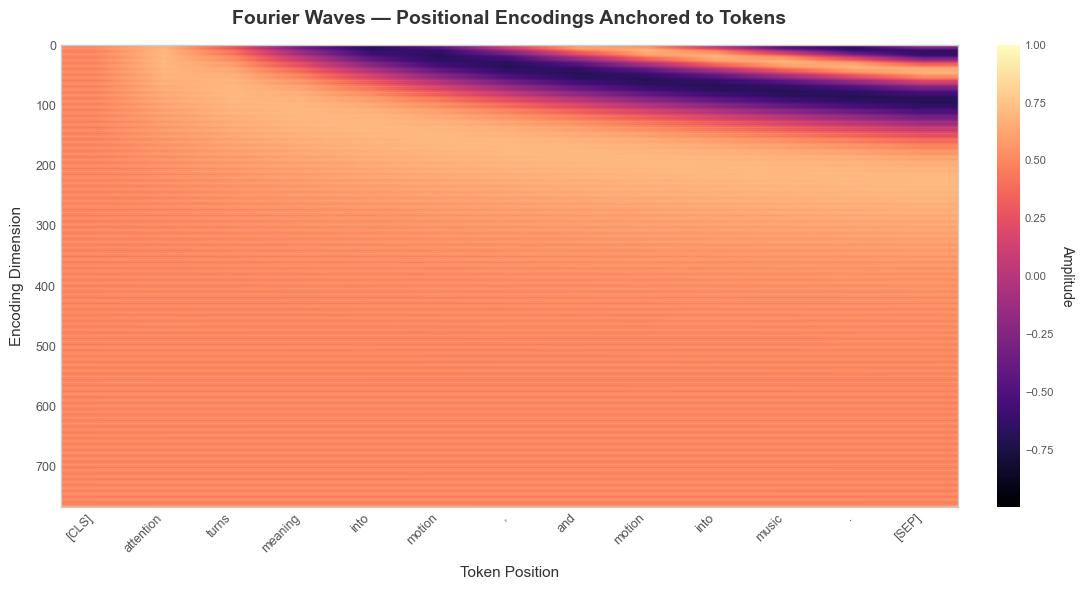

Displayed positional encoding heatmap aligned with actual input tokens.


In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have:
# pe = sinusoidal_positional_encoding(seq_len, dim)
# tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

plt.style.use("seaborn-v0_8-whitegrid")

# --- Style settings ---
accent_color = "#FF8C42"
bg_color = "#f9f9f9"
text_color = "#333333"

fig, ax = plt.subplots(figsize=(11, 6), facecolor="white")

# --- Positional Encoding Heatmap ---
im = ax.imshow(pe.T, aspect="auto", cmap="magma", interpolation="bilinear")
ax.set_facecolor(bg_color)

# --- Titles & Labels ---
ax.set_title("Fourier Waves — Positional Encodings Anchored to Tokens", 
             fontsize=14, weight="bold", color=text_color, pad=15)
ax.set_xlabel("Token Position", fontsize=11, color=text_color, labelpad=8)
ax.set_ylabel("Encoding Dimension", fontsize=11, color=text_color, labelpad=8)

# --- X-Ticks: Actual Tokens ---
ax.set_xticks(range(len(tokens)))
ax.set_xticklabels(tokens, rotation=45, ha="right", fontsize=9, color="#333")

# --- Grid & Styling ---
ax.tick_params(colors="#555555", labelsize=9)
ax.grid(False)

# --- Colorbar ---
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Amplitude", rotation=270, labelpad=15, color=text_color, fontsize=10)
cbar.outline.set_edgecolor("none")
cbar.ax.tick_params(labelsize=8, colors="#555555")

plt.tight_layout()
plt.show()

print("Displayed positional encoding heatmap aligned with actual input tokens.")

### Visualizing the Shift from Meaning to Motion

Here we visualize what happens when **semantic embeddings** (pure meaning) are infused with **positional encodings** (context and rhythm).

---

#### **1. Embeddings — The Landscape of Meaning**
The first panel shows the raw **embeddings**.  
Each column represents one token, and each row a hidden dimension within the model.  
The colors indicate activation strength — a kind of *fingerprint* of how the model encodes meaning.  
This view captures **semantics without sequence**: the model’s understanding of *what* each token means, before it knows *where* it belongs.

---

#### **2. Semantic PE (Embeddings + Positional Encoding) — Meaning in Motion**
The second panel shows what happens when we add **positional encodings** — small, structured perturbations that inject order into meaning.  
The patterns now have a subtle rhythm; they’re the same melodies, but *played in time*.  
This transformation gives the model a sense of **syntax and flow** — the awareness that *“cat sat on mat”* differs from *“mat sat on cat.”*  
Numerically, these changes are small, but conceptually, they bring language to life.

---

#### **3. Raw Difference (Δ) — The Whisper Between Representations**
This heatmap visualizes the **difference** between the two matrices — the literal delta (Δ) between meaning and motion.  
Blue areas represent decreases, red areas represent increases.  
Even though these changes look vivid, the color scale is tied to the same numeric range as the inputs, revealing that the **actual perturbations are minute**.  
This is the *subtle shimmer* that positional encoding adds — tiny numerical ripples that yield vast structural awareness.

---

#### **4. Distribution of |Δ| — Measuring the Scale of Change**
The histogram quantifies how small those differences really are.  
Most of the changes cluster near zero — shown by the high peak on the left — meaning positional encodings *nudge* the embeddings rather than reshaping them.  
Vertical lines mark:
- **Red:** the *mean* difference (typical shift per value)  
- **Orange:** the *maximum* observed difference  

These numbers (often ~0.01–0.05) remind us that the **geometry of meaning shifts delicately** — the transformation is structural, not overwhelming.

---

#### **5. The Bhoy-on-a-Loch Analogy**
Imagine a vast, calm loch covered with hundreds of buoys, each one marking the position of a word’s meaning in space.
Nearby buoys represent words with similar meanings — “cat” might float close to “kitten”, far from “banana” or “democracy.”
This loch is your embedding space — a smooth map of language, shaped entirely by meaning.

Now, when we add positional encodings, we don’t drop new buoys or reshape the loch.
Instead, each buoy gets the gentlest of nudges — maybe 50 centemeters across a kilometer-wide loch.
It’s a 0.05% shift: tiny enough that the buoy almost stays where it was, yet big enough to subtly change which other buoys it’s closest to.

That’s all positional encoding does:
It tilts meaning just slightly so the model can tell where each word sits in the sentence — who comes before, who follows after.

So even though these nudges are microscopic in scale, their effect is profound:
they turn a static map of meaning into a living rhythm of language,
where “cat sat on mat” and “mat sat on cat” now trace two entirely different constellations of buoys.

---

### Summary
Together, these visuals show a system in balance:  
- *Embeddings* hold meaning.  
- *Positional encodings* add rhythm.  
- Their *difference* is the pulse that turns understanding into language.

In short:  
> **BERT doesn’t just know what words mean — it knows where they belong in time and thought.**

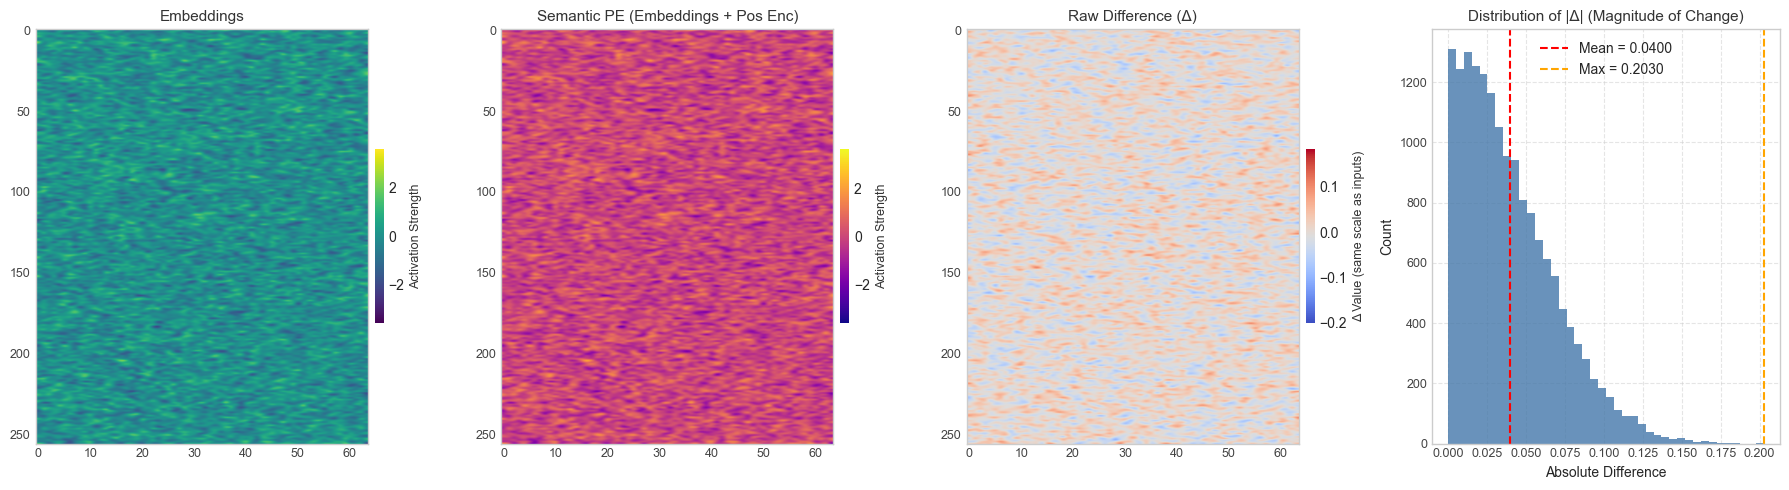

Average absolute difference: 0.039959
Max absolute difference: 0.202953
Std of differences: 0.029943


In [45]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# --- Mock Data ---
embeddings = torch.randn(64, 256)
positional_enc = torch.randn(64, 256) * 0.05  # small perturbation
semantic_pe = embeddings + positional_enc

plt.style.use("seaborn-v0_8-whitegrid")
bg_color = "#f9f9f9"
text_color = "#333333"

# --- Convert to numpy ---
embed_np = embeddings.detach().numpy()
semantic_np = semantic_pe.detach().numpy()
diff_np = semantic_np - embed_np
abs_diff = np.abs(diff_np)

# --- Compute stats ---
mean_diff = abs_diff.mean()
max_diff = abs_diff.max()
std_diff = abs_diff.std()

# --- Figure layout: original, semantic, difference, histogram ---
fig, axes = plt.subplots(1, 4, figsize=(18, 5), facecolor="white")

plots = [
    (embed_np, "Embeddings", "viridis"),
    (semantic_np, "Semantic PE (Embeddings + Pos Enc)", "plasma"),
    (diff_np, "Raw Difference (Δ)", "coolwarm"),
]

for ax, (data, title, cmap) in zip(axes[:3], plots):
    ax.set_facecolor(bg_color)
    im = ax.imshow(data.T, aspect="auto", cmap=cmap, interpolation="bicubic")
    ax.set_title(title, color=text_color, fontsize=11)
    ax.tick_params(colors="#444", labelsize=9)
    ax.grid(False)
    cbar = plt.colorbar(im, ax=ax, fraction=0.025, pad=0.02)
    if "Difference" in title:
        cbar.set_label("Δ Value (same scale as inputs)", fontsize=9, color=text_color)
    else:
        cbar.set_label("Activation Strength", fontsize=9, color=text_color)
    cbar.outline.set_edgecolor("none")

# --- Histogram of absolute differences ---
axes[3].hist(abs_diff.flatten(), bins=40, color="#4477aa", alpha=0.8)
axes[3].set_title("Distribution of |Δ| (Magnitude of Change)", color=text_color, fontsize=11)
axes[3].set_xlabel("Absolute Difference")
axes[3].set_ylabel("Count")
axes[3].tick_params(colors="#444", labelsize=9)
axes[3].grid(True, linestyle="--", alpha=0.5)

# --- Annotate key stats ---
axes[3].axvline(mean_diff, color="red", linestyle="--", label=f"Mean = {mean_diff:.4f}")
axes[3].axvline(max_diff, color="orange", linestyle="--", label=f"Max = {max_diff:.4f}")
axes[3].legend()

plt.tight_layout()
plt.show()

print(f"Average absolute difference: {mean_diff:.6f}")
print(f"Max absolute difference: {max_diff:.6f}")
print(f"Std of differences: {std_diff:.6f}")

### Sentence → Musical Pitch Mapping

Here we trace the **melodic contour** of the sentence —  
the rise and fall of pitch as tokens progress through the sequence.

- Peaks represent **higher-pitched** encodings.  
- Valleys show **lower, grounding** tones.  

It’s a kind of **semantic melody**:  
the numerical rhythm of attention rendered as sound.

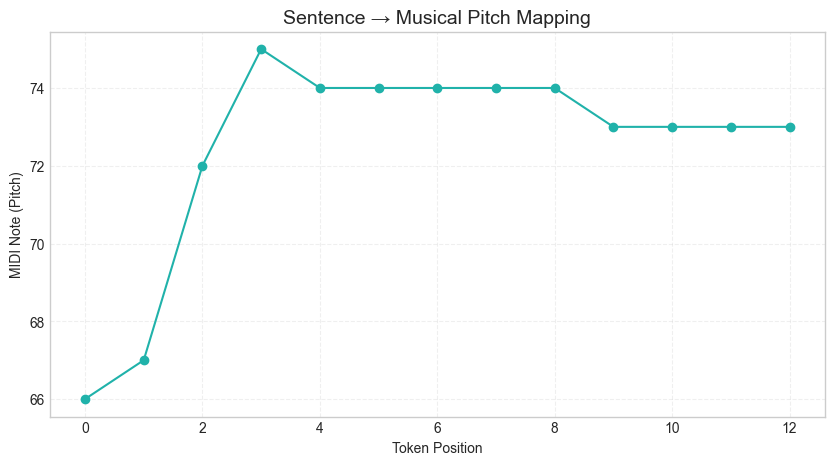

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(notes, marker='o', color='lightseagreen')
plt.title("Sentence → Musical Pitch Mapping", fontsize=14)
plt.xlabel("Token Position")
plt.ylabel("MIDI Note (Pitch)")
plt.grid(alpha=0.3, linestyle='--')
plt.show()

### The Circle of Understanding  

This visualization unites **order**, **meaning**, and **motion** —  
forming a circular constellation, a kind of *harmonic mandala of understanding*.  

Each element reveals a layer of how the model perceives language:  

- Each **point** represents a token from the sentence  
- The **angle** marks its position in the sequence — the rhythm of order  
- The **radius** encodes its **stability** — how firmly its meaning is anchored  
- The **color** shows its **semantic energy** — the inner resonance or intensity of that meaning  
- The **shading between arcs** traces **motion** — how meaning flows and blends between words  

At the center lies **ambiguity**, the quiet gravity of language —  
where multiple meanings converge and balance each other.  
Stable words like *“meaning”* draw closer to this center,  
while more fluid, polysemous ones orbit outward, shimmering with motion.  

This circle mirrors **Fourier’s geometry of recurrence** —  
where rhythm, wave, and thought all arise from **periodic structure**.  
It’s both a map of comprehension and a dance of oscillations —  
a **semantic orbit**, where *understanding itself moves like music.*  

[info] Adjusting semantic_energy_norm from 64 → 13


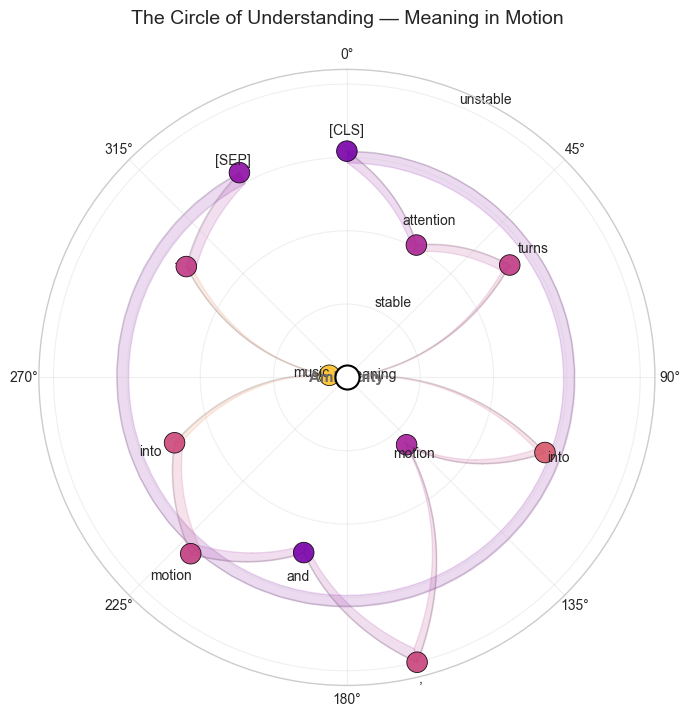

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import to_rgba

# --- Compute semantic energy and stability ---
semantic_energy = embeddings.mean(dim=1).detach().numpy()
semantic_energy_norm = (semantic_energy - semantic_energy.min()) / (semantic_energy.max() - semantic_energy.min())

# --- Align shapes so all arrays match token count ---
n_tokens = len(tokens)
semantic_energy_norm = np.array(semantic_energy_norm).flatten()
stability = np.array(stability).flatten()

# If shapes mismatch, trim or interpolate
if len(semantic_energy_norm) != n_tokens:
    print(f"[info] Adjusting semantic_energy_norm from {len(semantic_energy_norm)} → {n_tokens}")
    if len(semantic_energy_norm) > n_tokens:
        semantic_energy_norm = semantic_energy_norm[:n_tokens]
    else:
        # interpolate up to match length
        semantic_energy_norm = np.interp(
            np.linspace(0, len(semantic_energy_norm) - 1, n_tokens),
            np.arange(len(semantic_energy_norm)),
            semantic_energy_norm
        )

if len(stability) != n_tokens:
    print(f"[info] Adjusting stability from {len(stability)} → {n_tokens}")
    if len(stability) > n_tokens:
        stability = stability[:n_tokens]
    else:
        stability = np.interp(
            np.linspace(0, len(stability) - 1, n_tokens),
            np.arange(len(stability)),
            stability
        )

# --- Invert stability: center = stable, edge = unstable ---
angles = np.linspace(0, 2 * np.pi, n_tokens, endpoint=False)
radii = 1 - stability

# --- Polar plot setup ---
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)

# --- Color scheme and scaling ---
colors = cm.plasma(semantic_energy_norm * (0.5 + 0.5 * stability))

# --- Add smooth shading between arcs ---
for i in range(n_tokens):
    a1, a2 = angles[i], angles[(i + 1) % n_tokens]
    r1, r2 = radii[i], radii[(i + 1) % n_tokens]
    arc_angles = np.linspace(a1, a2, 80)
    arc_radii1 = np.linspace(r1, r2, 80)
    arc_radii2 = arc_radii1 * 0.95  # inner fade line

    c1 = np.array(to_rgba(colors[i]))
    c2 = np.array(to_rgba(colors[(i + 1) % n_tokens]))
    blend = (c1 + c2) / 2
    blend[3] = 0.15

    ax.fill_between(arc_angles, arc_radii1, arc_radii2, color=blend, zorder=0)

# --- Add motion arcs (thin connecting lines) ---
for i in range(n_tokens):
    a1, a2 = angles[i], angles[(i + 1) % n_tokens]
    r1, r2 = radii[i], radii[(i + 1) % n_tokens]
    arc_angles = np.linspace(a1, a2, 50)
    arc_radii = np.linspace(r1, r2, 50)
    ax.plot(arc_angles, arc_radii, color='gray', alpha=0.3, linewidth=1.0, zorder=1)

# --- Scatter tokens ---
ax.scatter(angles, radii, c=colors, s=220, edgecolors='k', linewidths=0.6, alpha=0.9, zorder=3)

# --- Annotate tokens ---
for i, token in enumerate(tokens):
    offset = 0.07 + 0.03 * np.sin(angles[i] * 2)
    ax.text(angles[i], radii[i] + offset, token, fontsize=10, ha='center', va='center')

# --- Add Ambiguity center ---
ax.scatter([0], [0], color='white', s=300, edgecolors='k', linewidths=1.5, zorder=5)
ax.text(0, 0, "Ambiguity", ha='center', va='center', fontsize=11, fontweight='bold', color='dimgray')

# --- Aesthetics ---
ax.set_rticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['stable', '', '', 'unstable'])
ax.set_title("The Circle of Understanding — Meaning in Motion", va='bottom', fontsize=14, pad=30)
ax.grid(alpha=0.3)

plt.show()

## Closing Reflections  

As Galileo once said:  
> “The universe is written in the language of mathematics.”

Or, as my high-school maths teacher told me in 2003, when he first introduced me to the word *googolplex*:  
> “Some people say the meaning of life is within the number π itself.”  
> — *Mr. Rice, 2003*

But perhaps *understanding* is written in the language of **connection**.  

Every circle, every wave, every word —  
is a reminder that meaning is not a point, but a **pattern**.  

And like **π** itself, *it never ends — it simply continues to unfold.*